
### Task 5 What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import datetime
import plotly.express as px
import json
import requests as re
# conda install -c conda-forge psycopg2

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('Data/FLIGHTS_cleaned.csv')

In [114]:
#exclude cancelled flights and get information about arrival and depature times
df_5 = df[['arr_delay','dep_delay']]

In [115]:
# Get insight as to how many flights expereince arrival and depature delays
total_flights = len(df_5)
arrivals_delays = len(df_5[df_5['arr_delay']>0])
dep_delays = len(df_5[df_5['dep_delay']>0])

In [116]:
df_delays = df_5[df_5.dep_delay>0]
df_arrays = df_5[df_5.arr_delay>0]
both_delayed = len(df_delays[df_delays.arr_delay > 0])

only_depature = len(df_delays) - len(df_delays[df_delays.arr_delay > 0])
only_arrival = len(df_arrays) - len(df_arrays[df_arrays.dep_delay > 0])

In [117]:
### can summarize our findings, remember to create docstring
def delay_findings():
    print("Total number of uncancelled flights taken into consideration was: {}".format(total_flights))
    print("Number of delayed flights was {} \nThis represented: {}% of departed flights ".format(dep_delays, round(dep_delays/total_flights*100,2)))
    print("Of these {} delayed flights there were: {} flights that also had arrival delays. \nWhich represented: {}% of departed flights".format(dep_delays,both_delayed,round(both_delayed/dep_delays*100,2)))

In [118]:
delay_findings()

Total number of uncancelled flights taken into consideration was: 196555
Number of delayed flights was 66640 
This represented: 33.9% of departed flights 
Of these 66640 delayed flights there were: 48584 flights that also had arrival delays. 
Which represented: 72.91% of departed flights


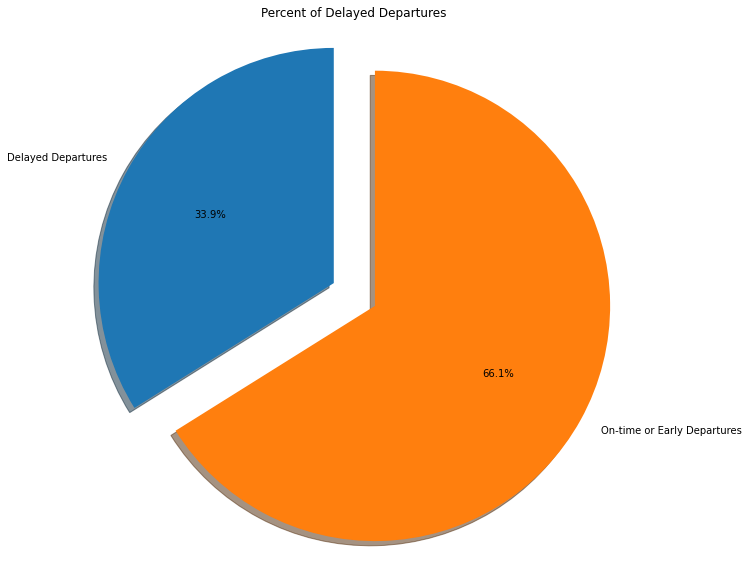

In [119]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Delayed Departures', 'On-time or Early Departures'
sizes = [dep_delays,total_flights-dep_delays]
explode = (0.1, 0.1)  

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.title('Percent of Delayed Departures')
plt.show()

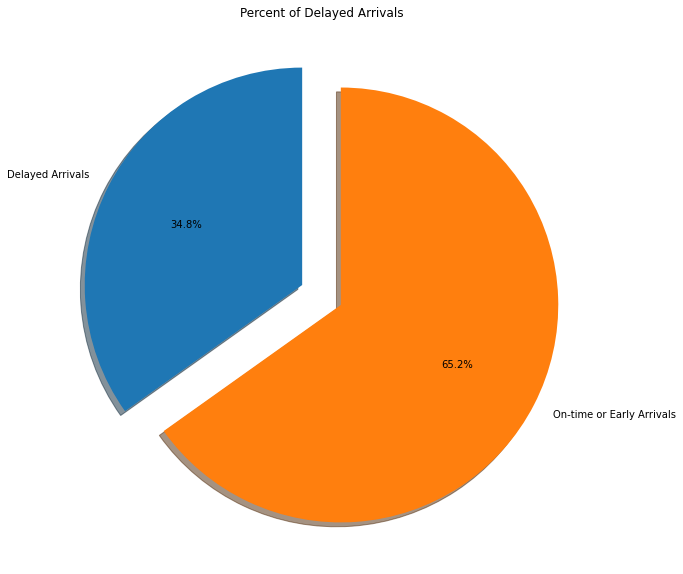

In [120]:
labels = 'Delayed Arrivals', 'On-time or Early Arrivals'
sizes = [arrivals_delays, total_flights-arrivals_delays]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent of Delayed Arrivals')
plt.show()

### Task 6: How many states cover 50% of US air traffic?

In [121]:
#Looking at our flights datframe we can group by origin name and determine which spots correspond have the largest number of flight departures
states = df.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).head(20)

In [122]:
states

origin_city_name
Chicago, IL              11715
Atlanta, GA               9735
New York, NY              7258
Dallas/Fort Worth, TX     7093
Denver, CO                6790
Charlotte, NC             6221
Los Angeles, CA           6159
Houston, TX               5973
Washington, DC            5787
Seattle, WA               4775
Phoenix, AZ               4599
San Francisco, CA         4509
Detroit, MI               4353
Las Vegas, NV             4141
Minneapolis, MN           4031
Newark, NJ                3914
Philadelphia, PA          3774
Boston, MA                3687
Orlando, FL               3460
Salt Lake City, UT        2994
Name: taxi_in, dtype: int64

Text(0.5, 0, 'Us Cities')

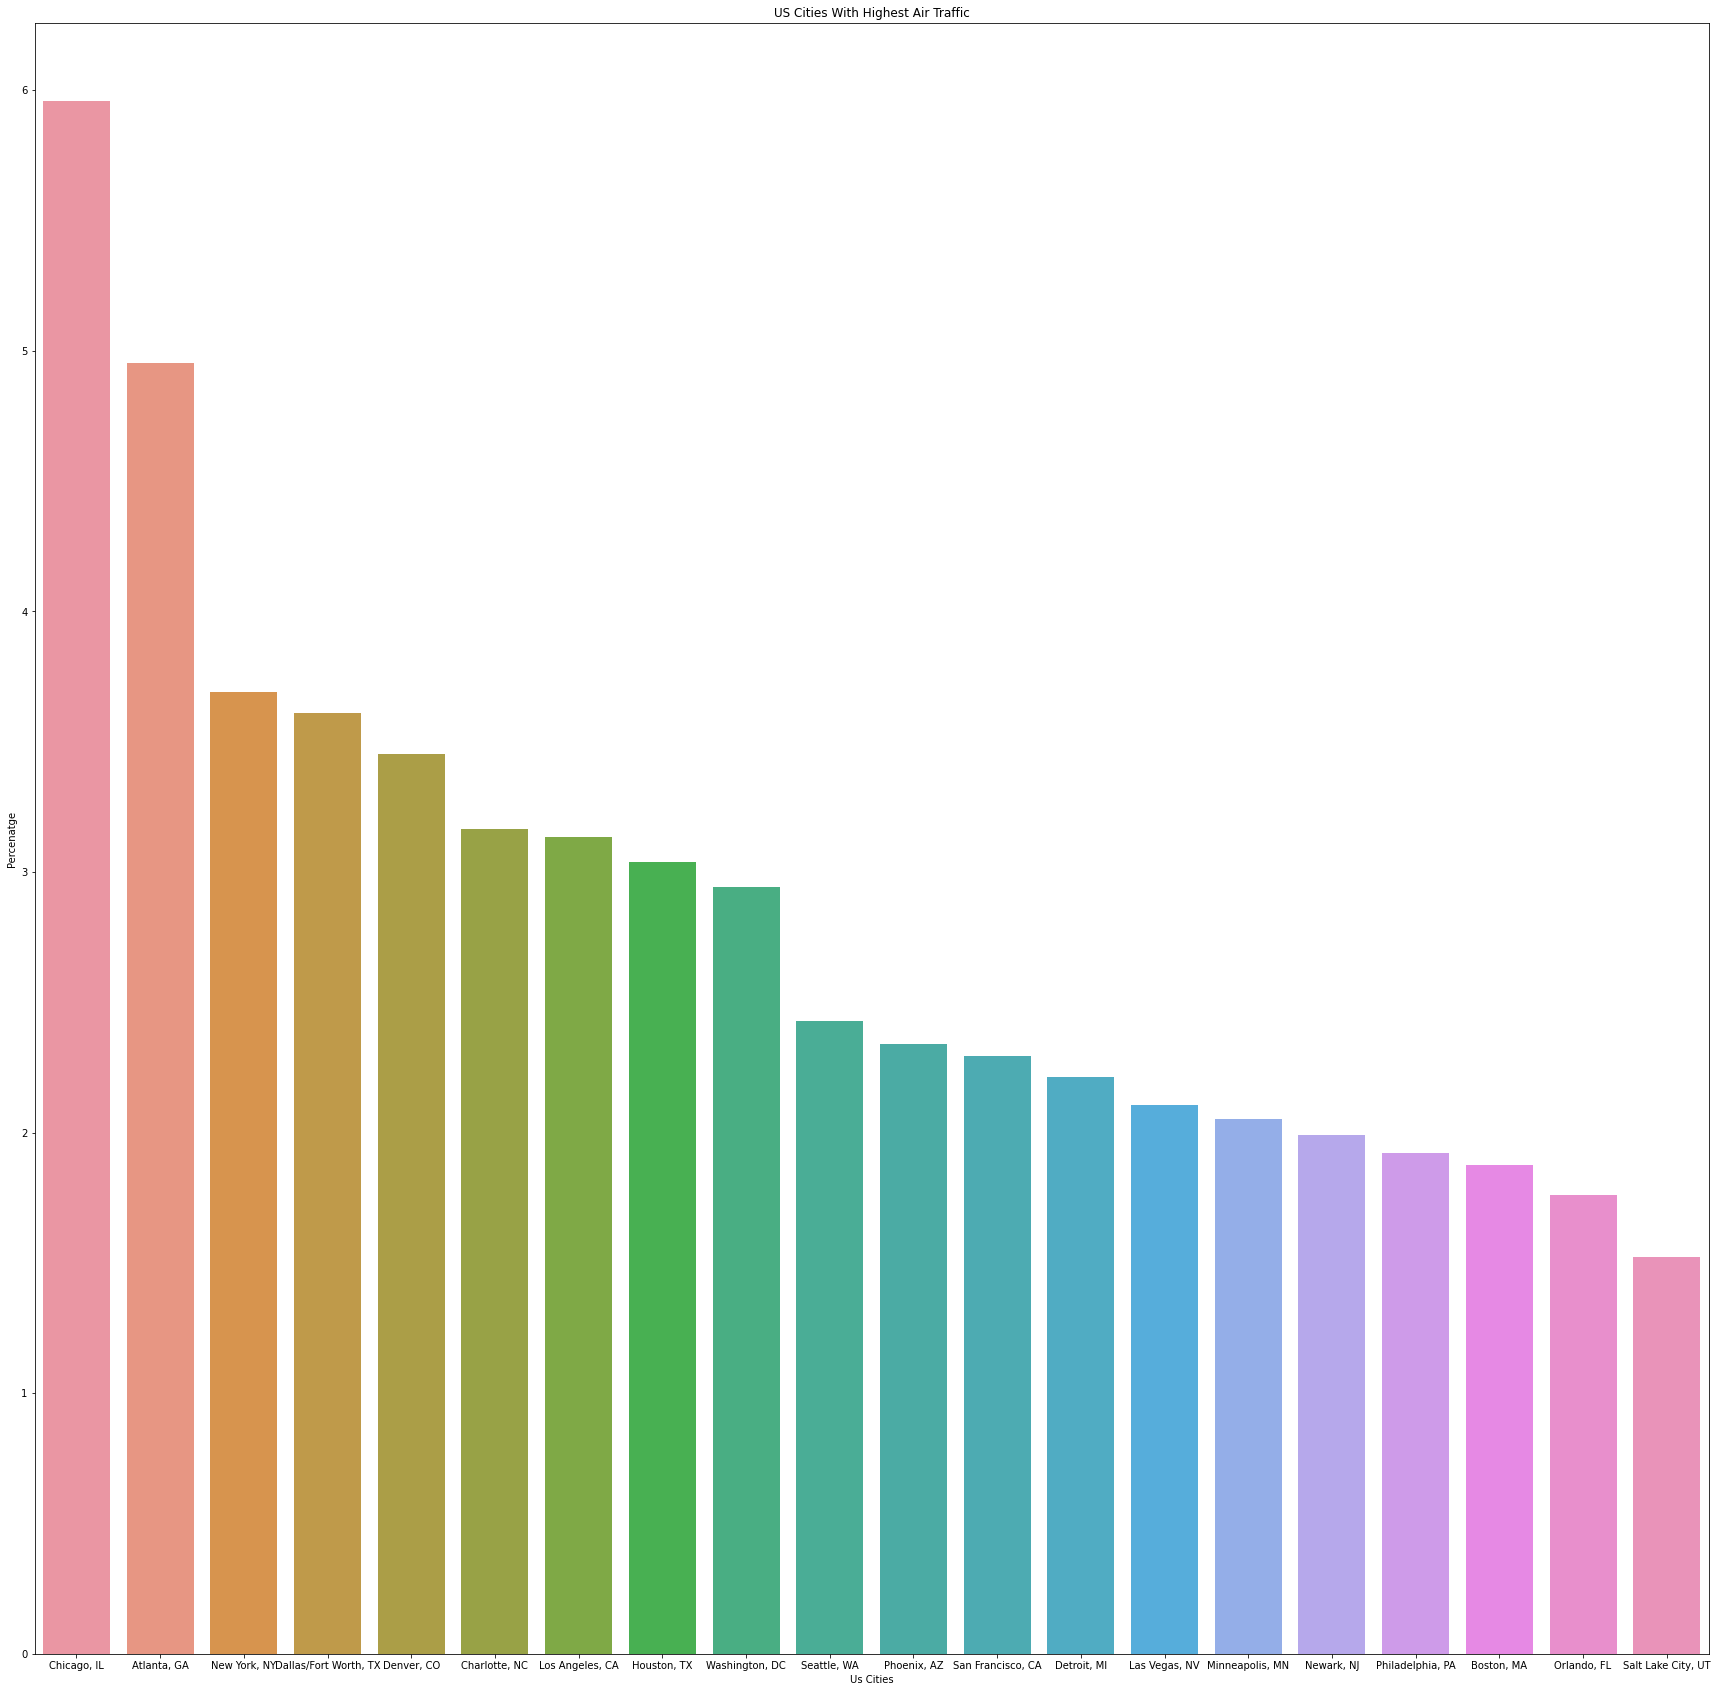

In [123]:
fig, ax = plt.subplots(figsize=(30,30))
sns.barplot(ax=ax, x=states.index, y = (states.values /total_flights)*100)
ax.set_title('US Cities With Highest Air Traffic')
ax.set_ylabel('Percenatge')
ax.set_xlabel('Us Cities')

In [124]:
#to answer our question we can figure out the air traffic percentage these provided states take up
print('The following states correspond to {}% of air traffic in the United States'.format(states.values.sum()/ total_flights* 100))

The following states correspond to 56.45646256772914% of air traffic in the United States
